# Estimation 101: Confidence Intervals

If you want to understand this notebook you first have to go read the previous one called "What the f is CLT?". Otherwise you will just read somethign and think that I am a tremendous nerd. 

You possibly will think that anyway, but the effect will be amplified.

# The most useful estimation rule ever
Under this clickbait title I really want to show you something useful. 

Basically when you want to estimate a value (a scalar) which can be a voltage, a performance metric from a satellite or a click conversion rate on a website you will just be able to see draws of the random variable you want so desperately to strip. The best thing that you can possibly do is to estimate its mean via the sample mean. 

If you are indecent engineer you will show that mean value to you colleagues and then you would go check 9gag or whatever  thing consumes your time.

If you are a decent engineer -not entering into personal ethics here, you can be a pretty sound a-hole at the same time- you will provide a confidence interval.

It should read like this. **If you have a confidence interval (a, b) with 95% probability this means that you are 95% sure that the real thing (e.g. population mean) is within the interval (a, b)**. And you know this only via estimates. How?

You apply the following rule:

$$ Estimate = \bar X \pm Z_{1-\alpha} SE $$

In general you the estimate should be given as 

$$ Estimate = \bar X \pm Q_{1-\alpha} $$

Where $Q_{1-\alpha} $ is the quantile at $\alpha$ error (e.g. 5%), thus $1-\alpha$ probability (e.g. 95%).

Now, you know that your distribution is centered at the real mean, and that it has a standard deviation equal to the standard error, so you can just use the quantile of a standard normal ($\sigma = 1 $) and just multiply the quantile by the standard error.

If you don't know the variance of your distribution (that can be the case very well) you are allowed to use the sample variance, that'd be a second order error. Good enough is good enough.

That is all you need to understand confidence intervals, p-values and hypothesis testing.

Let's come back to the example of the election.

In [1]:
import numpy as np
import scipy.stats

p = 0.55
conf_alpha = 0.95
for sample_size in [100, 1000, 10000]:
    sample = np.random.binomial(1, p, size=sample_size)
    sample_mean, sample_SE = np.mean(sample), np.std(sample)/np.sqrt(sample_size)
    Z_alpha = scipy.stats.norm.ppf(conf_alpha) # Get the quantile from a standard normal
    print("Interval at {}% confidence with {} samples = ({}, {})".format(100*conf_alpha,
                                                                         sample_size,
                                                                         sample_mean - Z_alpha*sample_SE, 
                                                                         sample_mean + Z_alpha*sample_SE))

Interval at 95.0% confidence with 100 samples = (0.5505857582577507, 0.7094142417422493)
Interval at 95.0% confidence with 1000 samples = (0.5502947739840125, 0.6017052260159874)
Interval at 95.0% confidence with 10000 samples = (0.5344056363792842, 0.5507943636207158)


See that? The confidence interval just became narrower and narrower. The more samples you throw in, the better. 
And the best thing? **you estimated all this with just one sample, just one**.

## What happens when there aren't enough samples? Ask the student
If you are smart, and I believe that if you kept reading until here, you certainly are, you should have noticed that we are basing this assumption on the fact that we have enough samples so via CLT we assume that the distribution of the error is gaussian. But what if there aren't just enough samples to hold the CLT true?

No worries. Some clever fella figured this out in the past. Basically he said that instead of using a Normal, use better a T-student distribution, which basically is a Standard Normal but with fatter tails. Only one parameter drives the shape of the distribution: *degrees of freedom* (which can actually be a scalar, no need for integer here).
The number of degrees of freedom you should use is the same $n-1$.

In this case your estimate is be given as 

$$ Estimate = \bar X \pm t_{n-1,1-\alpha} {\sigma \over {\sqrt n}} $$

The more degrees of freedom you have, the closer you are to a normal.

Actually, some statiticians would recommend to use always a T-student since if there's enough data you would be using a standard normal anyway. 

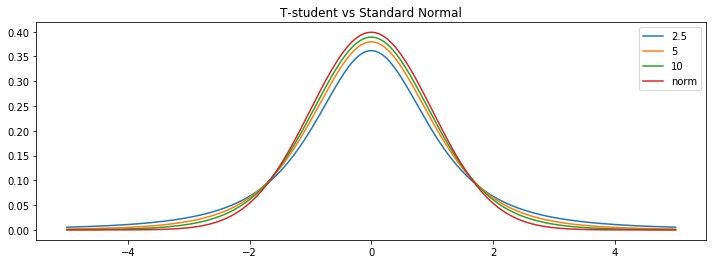

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
df_vec = [2.5, 5, 10]
plt.figure(figsize=(12,4))
for df in df_vec:
    t_pdf = scipy.stats.t.pdf(x, df=df)
    plt.plot(x, t_pdf)
plt.plot(x, scipy.stats.norm.pdf(x))
plt.legend(df_vec + ['norm'])
plt.title("T-student vs Standard Normal")
plt.show()


Let's now repeat the election test using a t-student and compare the intervals we would be getting with a normal

In [3]:
p = 0.55
conf_alpha = 0.95
for sample_size in [3, 5, 7, 100, 1000, 10000]:
    sample = np.random.binomial(1, p, size=sample_size)
    sample_mean, sample_SE = np.mean(sample), np.std(sample)/np.sqrt(sample_size)
    Z_alpha = scipy.stats.t.ppf(conf_alpha, df=sample_size-1)
    print("Interval at {}% confidence with {} samples = ({}, {})".format(100*conf_alpha,
                                                                         sample_size,
                                                                         sample_mean - Z_alpha*sample_SE, 
                                                                         sample_mean + Z_alpha*sample_SE))

Interval at 95.0% confidence with 3 samples = (-0.4613860809061802, 1.1280527475728468)
Interval at 95.0% confidence with 5 samples = (-0.181356345654566, 0.5813563456545661)
Interval at 95.0% confidence with 7 samples = (0.20796854188385977, 0.9348886009732831)
Interval at 95.0% confidence with 100 samples = (0.447130012138535, 0.6128699878614651)
Interval at 95.0% confidence with 1000 samples = (0.5160604429861656, 0.5679395570138345)
Interval at 95.0% confidence with 10000 samples = (0.5362074630069015, 0.5525925369930985)


With small degrees of freedom you basically know nothing, John Snow. But as you increase the number of samples you go close to the normal and it just works fine.

You might have noticed that with wider intervals you end up with values that are below 0 or above 1. This is because the mean itself is a concept with no boundaries, however, for a binomial since it represents a probability it makes no sense. Consider that we are not telling the estimation process which sort of variable we are dealing with - it is all gaussian or t-student.

# A/B testing

A/B testing means that you alter a certain parameter on the population and you want to estimate correctly what happenned.
- The A group is the control group, you don't change anything about it and thus you should observe the population statistics.
- The B group is the experiment group, you alter something about them (you give them a drug, you show them banners in a different order) and thus you are hoping to measure altered statistical properties - that's it, if the alteration you introduced had any effect.

The point is that you must know whether the change had any effect at all or not.

This is good stuff. Really, good stuff. You should be able to navigate through the probabilistic waters safely and then extract a result.

In this case you want to measure safely the difference between A and B by the following estimate:

$$ \bar X_B - \bar X_A \pm t_{n_a + n_b -2, 1-\alpha} S_p \sqrt{({1\over n_a} + {1\over n_b} )} $$

Where  $S_p$ is like a weighted averaged variance by the number of samples

$$ S_p^2 = {{(n_a-1)s_a^2 + (n_b-1)s_y^2}\over{(n_a + n_b -2)}}$$

### Example:

Imagine you are running an ad campaign on some website and you want to measure if that banner that is costing you all this good money in adwords every day is actually worth it. You are showing that on a number of segments (cities, markets, devices) and then you end up with an aggregate conversion rate.
For the sake of the problem let's assume you have two groups, and they have different size but they behave like a normally distributed r.v. with different means and *same variance*.

The mean of each group will tell you the conversion rate.


In [13]:
# I am very explicit on the code for demonstration
mu_a = 0.15  # that's the conversion rate when not showing the ad
mu_b = 0.2  # that's the conversion rate when running the add
both_std = 0.5 # applied only to one sample size 
conf_alpha = 0.95
print("We should see a difference of {}".format(mu_b - mu_a))
for sample_size in [5, 7, 100, 1000, 10000]:
    n_a = sample_size
    n_b = int(np.floor(sample_size/2))
    sample_a = np.random.normal(loc=mu_a, scale=both_std, size=n_a)
    sample_b = np.random.normal(loc=mu_b, scale=both_std, size=n_b)
    sample_diff = np.mean(sample_b) - np.mean(sample_a)
    df = n_a + n_b -2
    S_p = (n_a-1)*both_std**2 + (n_b-1)*both_std**2 
    S_p = np.sqrt(S_p/df)
    Z_alpha = scipy.stats.t.ppf(conf_alpha, df=df)
    sample_SE = S_p*np.sqrt(1/n_a + 1/n_b)
    print("Interval at {}% confidence with A={}, B={} samples = ({}, {})".format(100*conf_alpha,
                                                                          n_a, n_b,
                                                                          sample_diff - Z_alpha*sample_SE, 
                                                                          sample_diff + Z_alpha*sample_SE))

We should see a difference of 0.05000000000000002
Interval at 95.0% confidence with A=5, B=2 samples = (-1.0132077285233916, 0.6727026964214312)
Interval at 95.0% confidence with A=7, B=3 samples = (-0.7635972892977005, 0.5196127673394768)
Interval at 95.0% confidence with A=100, B=50 samples = (-0.13346983419681321, 0.15322172801537057)
Interval at 95.0% confidence with A=1000, B=500 samples = (-0.0038951616753700943, 0.08625293100116191)
Interval at 95.0% confidence with A=10000, B=5000 samples = (0.04320590788814805, 0.07169736825813444)


Note that here we are measuring the change of the two means, not the means themselves. We could also do that, but this is more accurate, specially when dealing with different sample sizes.

** Important note **: this works only when we know that the population variance of both samples (A and B) is the same. This should be known by the nature of the problem. If the variances are unequal a different approach must be used.

## A/B testing with different variances

So the rule we applied before works but only because these guys have the same variance, and we know it (well, we assume). But, if you repeat the experiment computing the sample variance you are throwing in an error that it is just to big and the estimation is just messed up, like big time.

In [16]:
print("We should see a difference of {}".format(mu_b - mu_a))
for sample_size in [5, 7, 100, 1000, 10000]:
    n_a = sample_size
    n_b = int(np.floor(sample_size/2))
    sample_a = np.random.normal(loc=mu_a, scale=both_std, size=n_a)
    sample_b = np.random.normal(loc=mu_b, scale=both_std, size=n_b)
    sample_diff = np.mean(sample_b) - np.mean(sample_a)
    df = n_a + n_b -2
    Sp = (n_a-1)*np.std(sample_a)**2 + (n_b-1)*np.std(sample_b)**2
    S_p = np.sqrt(S_p/df)
    Z_alpha = scipy.stats.t.ppf(conf_alpha, df=df)
    sample_SE = S_p*np.sqrt(1/n_a + 1/n_b)
    print("Interval at {}% confidence with A={}, B={} samples = ({}, {})".format(100*conf_alpha,
                                                                          n_a, n_b,
                                                                          sample_diff - Z_alpha*sample_SE, 
                                                                          sample_diff + Z_alpha*sample_SE))

We should see a difference of 0.05000000000000002
Interval at 95.0% confidence with A=5, B=2 samples = (-0.5347533494384681, -0.49861700173401624)
Interval at 95.0% confidence with A=7, B=3 samples = (0.007941227261832426, 0.10187518890616488)
Interval at 95.0% confidence with A=100, B=50 samples = (0.05189726047900844, 0.0609142485164832)
Interval at 95.0% confidence with A=1000, B=500 samples = (0.05930041615213401, 0.059884585714666136)
Interval at 95.0% confidence with A=10000, B=5000 samples = (0.05391910546039909, 0.05394559071941622)


The confidence interval estimates are all over the place! So, what can you do then? 

Don't worry, I have another formula for you. 

$$ \bar X_b - \bar X_a \pm t_{df} \sqrt{S_{na} + S_{nb}}$$

$$ S_{na} = {{S_a^2}\over{n_a}} $$
$$ S_{nb} = {{S_b^2}\over{n_b}} $$

$$ df = {{({S_{na}+S_{nb}})^2} \over {{S_{nb}^2}\over{n_b -1}}+{{S_{na}^2}\over{n_a -1}}}$$

** Example:**Let's put that in place with the election case, now since the variance depends on the probability, the variances are per-se different, and unknown.

In [31]:
p_a = 0.55
p_b = 0.6
conf_alpha = 0.95
print("We should observe a value of {:.3f}".format(p_b-p_a))
for sample_size in [5, 7, 100, 1000, 10000]:
    n_a = sample_size
    n_b = int(np.floor(sample_size/2))
    sample_a = np.random.binomial(1, p_a, size=n_a)
    sample_b = np.random.binomial(1, p_b, size=n_b)
    sample_diff = np.mean(sample_b) - np.mean(sample_a)
    S_na = np.var(sample_a)/n_a
    S_nb = np.var(sample_b)/n_b
    df = ((S_na + S_nb)**2) / ((S_na**2)/(n_a-1)+(S_nb**2)/(n_b-1))
    Z_alpha = scipy.stats.t.ppf(conf_alpha, df=df)
    sample_SE = np.sqrt(S_na + S_nb)
    print("Interval at {}% confidence with A={}, B={} samples, and {:.2f} df = ({:.3f}, {:.3f})".format(100*conf_alpha,
                                                                                            n_a, n_b, df,
                                                                                            sample_diff - Z_alpha*sample_SE, 
                                                                                            sample_diff + Z_alpha*sample_SE))

We should observe a value of 0.050
Interval at 95.0% confidence with A=5, B=2 samples, and 4.00 df = (-1.067, -0.133)
Interval at 95.0% confidence with A=7, B=3 samples, and 3.00 df = (-0.903, 0.522)
Interval at 95.0% confidence with A=100, B=50 samples, and 106.01 df = (0.044, 0.316)
Interval at 95.0% confidence with A=1000, B=500 samples, and 1003.46 df = (-0.019, 0.071)
Interval at 95.0% confidence with A=10000, B=5000 samples, and 10113.07 df = (0.027, 0.055)


Well then, now works just fine. Both random variables have different variances and we do not know them and still we are able to estimate with *confidence* the probability of having an effective campaign. 
Notice however, that this is not froopyland, it's a *hard* problem and even having 100000 degrees of freedom (which is basically a normal) doesn't give us a lot of confidence, but OK, at least we know that the probability is higher for sure.

In [5]:
scipy.stats.mstats.ttest_onesamp(sample, 0.55)

Ttest_1sampResult(statistic=-1.124385911360345, pvalue=0.26087633752719697)